In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_excel("Final_Dataset.xlsx")
df.head()

,sensor_id,location,lat,lon,timestamp,pressure,temperature,humidity,P1,P2
0,2266,1140,42.738,23.272,2017-07-01T00:00:07,95270.27,23.46,62.48,2.20,1.23
1,2292,1154,42.663,23.273,2017-07-01T00:00:08,94355.83,23.06,59.46,35.17,27.50
2,3096,1558,42.700,23.360,2017-07-01T00:00:10,95155.81,26.53,44.38,4.30,2.83
3,3428,1727,42.624,23.406,2017-07-01T00:00:12,94679.57,28.34,38.28,20.63,12.17
4,3472,1750,42.669,23.318,2017-07-01T00:00:13,94327.88,26.31,46.37,7.53,4.30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sensor_id    2400 non-null   int64  
 1   location     2400 non-null   int64  
 2   lat          2400 non-null   float64
 3   lon          2400 non-null   float64
 4   timestamp    2400 non-null   object 
 5   pressure     2400 non-null   float64
 6   temperature  2400 non-null   float64
 7   humidity     2400 non-null   float64
 8   P1           2400 non-null   float64
 9   P2           2400 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 187.6+ KB


In [4]:
df.isnull().sum()

sensor_id      0
location       0
lat            0
lon            0
timestamp      0
pressure       0
temperature    0
humidity       0
P1             0
P2             0
dtype: int64

In [11]:
time_col = df["timestamp"]
df_no_time = df.drop("timestamp", axis=1)

In [13]:
df_no_time

,sensor_id,location,lat,lon,pressure,temperature,humidity,P1,P2
0,2266,1140,42.738,23.272,95270.27,23.46,62.48,2.20,1.23
1,2292,1154,42.663,23.273,94355.83,23.06,59.46,35.17,27.50
2,3096,1558,42.700,23.360,95155.81,26.53,44.38,4.30,2.83
3,3428,1727,42.624,23.406,94679.57,28.34,38.28,20.63,12.17
4,3472,1750,42.669,23.318,94327.88,26.31,46.37,7.53,4.30
...,...,...,...,...,...,...,...,...,...
2395,12775,6451,42.630,23.382,95004.36,16.46,62.69,26.93,18.82
2396,6228,3147,42.696,23.280,95683.37,19.73,64.11,491.70,226.13
2397,18137,9194,42.632,23.298,93240.36,14.74,91.15,15.50,10.97
2398,6389,3227,42.654,23.360,95168.52,20.47,55.28,15.37,7.20


In [15]:
# scale features
scaler = MinMaxScaler()
model=scaler.fit(df_no_time)
scaled_data=model.transform(df_no_time)
 
# print scaled features
print(scaled_data)

[[0.05496722 0.05117187 0.78974359 ... 0.6248     0.00110006 0.00123012]
 [0.05590375 0.05208333 0.40512821 ... 0.5946     0.01758588 0.02750275]
 [0.0848642  0.07838542 0.59487179 ... 0.4438     0.00215011 0.00283028]
 ...
 [0.62664794 0.57552083 0.24615385 ... 0.9115     0.00775039 0.0109711 ]
 [0.20347958 0.18704427 0.35897436 ... 0.5528     0.00768538 0.00720072]
 [0.11137526 0.78815104 0.4        ... 0.4608     0.00651533 0.00980098]]


In [19]:
time_series_data = pd.DataFrame(scaled_data, columns=df_no_time.columns)

In [21]:
time_series_data["timestamp"] = time_col
time_series_data.head(5)

,sensor_id,location,lat,lon,pressure,temperature,humidity,P1,P2,timestamp
0,0.054967,0.051172,0.789744,0.287234,0.634341,0.935982,0.6248,0.001100,0.001230,2017-07-01T00:00:07
1,0.055904,0.052083,0.405128,0.292553,0.629205,0.933793,0.5946,0.017586,0.027503,2017-07-01T00:00:08
2,0.084864,0.078385,0.594872,0.755319,0.633699,0.952780,0.4438,0.002150,0.002830,2017-07-01T00:00:10
3,0.096823,0.089388,0.205128,1.000000,0.631024,0.962683,0.3828,0.010316,0.012171,2017-07-01T00:00:12
4,0.098408,0.090885,0.435897,0.531915,0.629049,0.951576,0.4637,0.003765,0.004300,2017-07-01T00:00:13


In [22]:
import matplotlib.pyplot as plt 

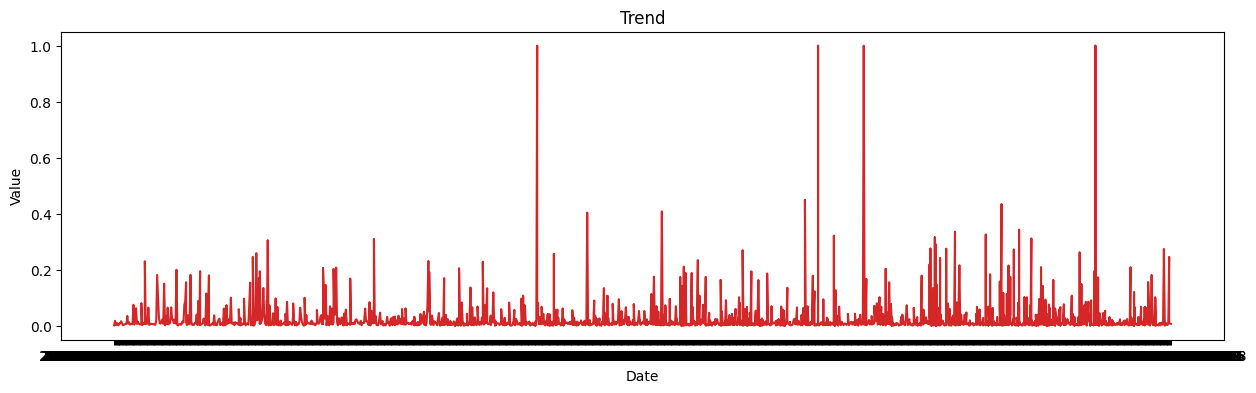

In [23]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, 
        x = time_series_data['timestamp'], 
        y = time_series_data['P1'], 
        title = 'Trend')

<Figure size 2000x2000 with 0 Axes>

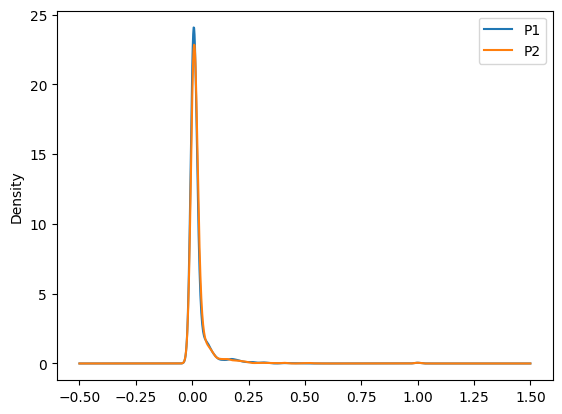

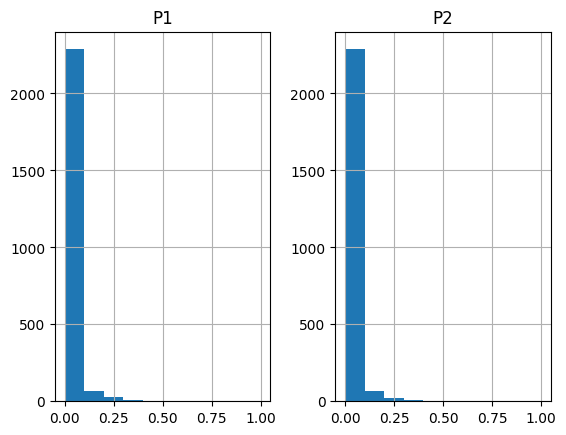

In [35]:

from pandas import read_csv
from matplotlib import pyplot
plt.figure(figsize=(20,20))
to_plot = time_series_data[["P1", "P2"]]
to_plot.plot(kind="kde")
to_plot.hist()
pyplot.show()